In [1]:
import numpy as np 
import matplotlib.pyplot as plt
import csv

In [9]:
with open('Raw Data.csv', mode='r') as archivo:   # abre el archivo raw, y lo deja listo para lectura
    datos = csv.reader(archivo)
    encabezado = next(datos, None)
    if encabezado:
        print ("primeras lineas", encabezado)   #imprime las primeras lineas del arrego
    t, latitud, longitud, altitud = [], [], [], []
    for renglon in datos:
        t.append(float (renglon [0]))       #agrega los datos que quieras, al arreglo (no es eficiente), se usa cuando no sabemos cuántos datos se tienen
                        # si se sabe cuántos tiene, es mejor generar un arreglo con ceros, y sobre ese arreglo sobreescribir los datos
        latitud.append(float ( renglon [1]))
        longitud.append(float  (renglon [2]))
        altitud.append(float  (renglon [3]))
# datos es un apuntador, no tiene dato, más bien señala dónde están los datos; renglón actúa como índice 
    t, latitud = np.array(t),  np.array(latitud)  # es una lista, acá lo volvemos vector
    longitud, altitud = np.array(longitud), np.array(altitud)
             

primeras lineas ['Time (s)', 'Latitude (°)', 'Longitude (°)', 'Altitude (m)', 'Altitude WGS84 (m)', 'Speed (m/s)', 'Direction (°)', 'Distance (km)', 'Horizontal Accuracy (m)', 'Vertical Accuracy (m)', 'Satellites']


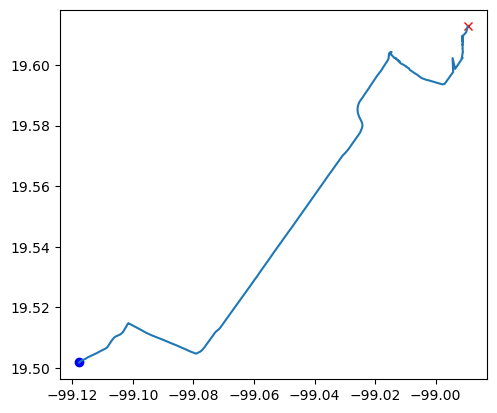

In [12]:
plt.plot (longitud[0],latitud [0],'rx')
plt.plot(longitud [-1], latitud[-1],'bo')
plt.plot(longitud, latitud)
plt.gca().set_aspect('equal')
plt.show()

In [36]:
def ler_csv(arch):
    with open(arch, mode='r') as archivo:    # éste whit solo sirve para el bloque determinado por la sangría 
        datos = csv.reader(archivo)
        encabezado = next(datos, None)
        #if encabezado:
         #   print ("primeras lineas", encabezado, len(encabezado)) 
        mat_dat = []
        for renglon in datos:
            mat_dat.append(renglon[:4]) # con ésto se acota a las primeras 4 columnas (de 0 a 3)
    dat = np.zeros((len(mat_dat),4))        
    for i in range (len(mat_dat)):
        for j in range(4):
            dat[i,j] = mat_dat[i][j]
    return dat        
    #mat_dat = np.array(mat_dat) #conversión a matríz    mat_dat[i,j] i es columna y j es renglon
    


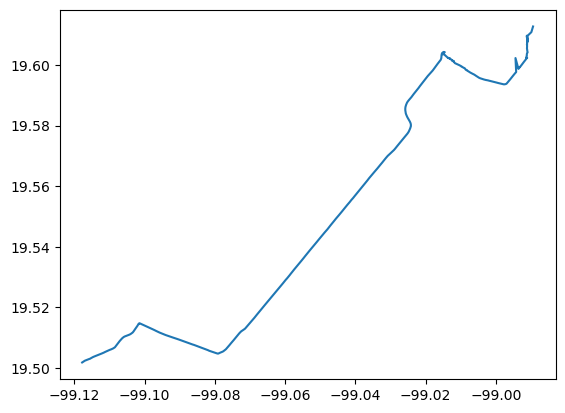

In [37]:
mat = ler_csv('Raw Data.csv')
plt.plot(mat[:,2],mat[:,1])

In [15]:
# EJERCICIO

a = [[1,2],[3,4],[5,6]]
a = np.array(a)
a[:,0]  #imprime la primer colúmna 
a[0,:]  #imprime el primer renglón 

array([1, 2])

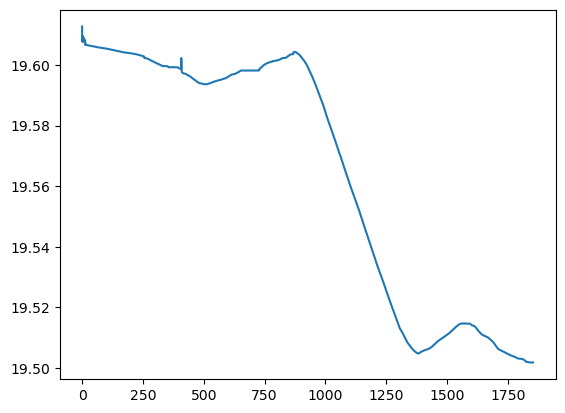

In [40]:
# PASANDO A COORDENADAS ESFERICAS 
RT = 6731000
x = mat[:,1]*np.cos(mat[:,1])*np.cos(mat[:,2])
y = mat[:,1]*np.cos(mat[:,1])*np.sin(mat[:,2])
z = mat[:,1]*np.sin(mat[:,1]) 
d = np.sqrt(x**2 + y**2 + z**2)
plt.plot (mat[:,0],d)
plt.show()

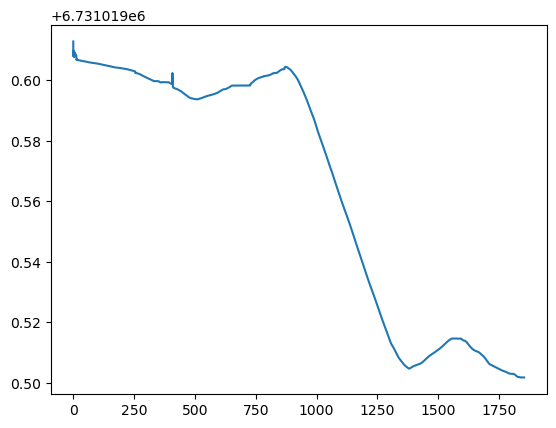

In [41]:
# PASANDO A COORDENADAS ESFERICAS 
RT = 6731000
x = (mat[:,1]+RT)*np.cos(mat[:,1])*np.cos(mat[:,2])
y = (mat[:,1]+RT)*np.cos(mat[:,1])*np.sin(mat[:,2])
z = (mat[:,1]+RT)*np.sin(mat[:,1]) 
dist_acumulada = np.zeros(len(mat[:,1]))
for i in range (len(mat[:,1])-1):
    dist_acumulada[i+1] = np.sqrt (x[i+1]-x[i] )
plt.plot (mat[:,0],d)
plt.show()

#NO TERMINADO 